# Yahia Kamel Hussein

## What countries have offered their citizens the best living standards  between 2015-2021, as observed by happiness score, social support, economy, freedom, and government corruption?

### As an international student who has lived in multiple different countries over the years, I have observed that standard of living is determined and affected by a number of factors. While it is important for citizens to feel economically and financially supported by their governments, it is equally as important to consider psychological factors such as happiness and social support. 

#### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns #Understanding my variables

#### Setting the theme for future visualizations

In [ ]:
sns.set_theme(style ="white", font_scale = 1.2)

#### Reading the csv file

In [ ]:
df = pd.read_csv('../data/raw/world_happiness_report.csv')
#print(df)

#### Understanding my Dataset

In [ ]:
print("First Five Rows and Columns: ",df.shape)
print("Head: ", df.head())
print("Columns: ", df.columns)

First Five Rows and Columns:  (1229, 12)
Head:     Unnamed: 0  Happiness Rank      Country          Region Happiness Score  \
0           0               1  Switzerland  Western Europe           7.587   
1           1               2      Iceland  Western Europe           7.561   
2           2               3      Denmark  Western Europe           7.527   
3           3               4       Norway  Western Europe           7.522   
4           4               5       Canada   North America           7.427   

  Economy (GDP per Capita) Family (Social Support) Health (Life Expectancy)  \
0                  1.39651                 1.34951                  0.94143   
1                  1.30232                 1.40223                  0.94784   
2                  1.32548                 1.36058                  0.87464   
3                    1.459                 1.33095                  0.88521   
4                  1.32629                 1.32261                  0.90563   

   Freed

#### Preview the dataset

In [ ]:
#df.info()

#### This output shows that the survey includes data for all countries (158 unique values under 'Countries') in the international area over a span of 8 years

In [ ]:
unique_values = df.nunique(axis=0)
#print(unique_values)

'''This output shows that the survey includes data for all countries (158 unique values under 'Countries') in the international area over a span of 8 years'''

"This output shows that the survey includes data for all countries (158 unique values under 'Countries') in the international area over a span of 8 years"

#### To show which countries and regions are being analyzed. This showcases that there are some countries that are assigned a '*', and some regions are null: '-'

In [ ]:
#print("Countries: ", df['Country'].unique())

#print("Regions: ", df['Region'].unique())

''' To show which countries and regions are being analyzed. This showcases that there are some countries that are assigned a '*', and some regions are null: '-'
'''

" To show which countries and regions are being analyzed. This showcases that there are some countries that are assigned a '*', and some regions are null: '-'\n"

#### Dropping rows with null values

In [ ]:
df_cleaned = df[df.Region != '-']
#print(df_cleaned)

'''To delete all instances where region is null'''

'To delete all instances where region is null'

#### This analysis showcases the timespan for which we can analyze trends

In [ ]:
print(df['Year'].unique())

'''This analysis showcases the timespan for which we can analyze trends'''

[2015 2016 2017 2018 2019 2020 2021 2022]


'This analysis showcases the timespan for which we can analyze trends'

#### To ensure there are no null values in the dataset to be cleaned

In [ ]:
check_null_values = df.isnull().values.any()
print(check_null_values)

''' To ensure there are no null values in our dataset to be cleaned'''

False


' To ensure there are no null values in our dataset to be cleaned'

#### To drop Unnamed column and ensure the column has been deleted

In [ ]:
df_cleaned_2= df_cleaned.drop(df_cleaned.columns[0], axis=1)
print(df_cleaned_2.shape)

'''To drop Unnamed column and ensure the column has been deleted'''

(1183, 11)


'To drop Unnamed column and ensure the column has been deleted'

#### 2022 had the data in the columns formatted using commas as opposed to periods to represent numerical data


In [ ]:
df_cleaned_3 = df_cleaned_2[df_cleaned_2.Year != 2022]
#print(df_cleaned_3)
'''2022 had the data in the columns formatted using commas as opposed to periods to represent numerical data'''

'2022 had the data in the columns formatted using commas as opposed to periods to represent numerical data'

#### Changing the columns dtype to float as they were objects and that cannot be used for analysis

In [ ]:
df_cleaned_3["Happiness Score"]=df_cleaned_3["Happiness Score"].astype(float)
df_cleaned_3["Economy (GDP per Capita)"]=df_cleaned_3["Economy (GDP per Capita)"].astype(float)
df_cleaned_3["Family (Social Support)"]=df_cleaned_3["Family (Social Support)"].astype(float)
df_cleaned_3["Health (Life Expectancy)"]=df_cleaned_3["Health (Life Expectancy)"].astype(float)
df_cleaned_3["Freedom"]=df_cleaned_3["Freedom"].astype(float)
df_cleaned_3["Trust (Government Corruption)"]=df_cleaned_3["Trust (Government Corruption)"].astype(float)

C:\Users\Dell\AppData\Local\Temp\ipykernel_3508\2585888970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_3["Happiness Score"]=df_cleaned_3["Happiness Score"].astype(float)
C:\Users\Dell\AppData\Local\Temp\ipykernel_3508\2585888970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_3["Economy (GDP per Capita)"]=df_cleaned_3["Economy (GDP per Capita)"].astype(float)
C:\Users\Dell\AppData\Local\Temp\ipykernel_3508\2585888970.py:3: SettingWithCopyWarning: 
A value is trying to be se

#### Checking to see if the columns have changed + to check what columns can be dropped

In [ ]:
df_cleaned_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1082
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 1064 non-null   int64  
 1   Country                        1064 non-null   object 
 2   Region                         1064 non-null   object 
 3   Happiness Score                1064 non-null   float64
 4   Economy (GDP per Capita)       1064 non-null   float64
 5   Family (Social Support)        1064 non-null   float64
 6   Health (Life Expectancy)       1064 non-null   float64
 7   Freedom                        1064 non-null   float64
 8   Trust (Government Corruption)  1064 non-null   float64
 9   Generosity                     1064 non-null   object 
 10  Year                           1064 non-null   int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 99.8+ KB


#### I have dropped Year and Generosity columns as I am not going to need it for my analysis

In [ ]:
dropped_df = df_cleaned_3.drop(['Year', 'Generosity'], axis=1)
''' I have dropped Year and Generosity columns as I am not going to need it for my analysis'''

' I have dropped Year and Generosity columns as I am not going to need it for my analysis'

In [ ]:
#dropped_df.info()

In [ ]:
dropped_df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption)
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,77.790414,5.418920,0.919224,1.050222,0.613049,0.430625,0.127485
std,44.819322,1.119277,0.399295,0.332545,0.247509,0.152321,0.108336
min,1.000000,2.523000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,4.571000,0.618450,0.840197,0.439750,0.329094,0.055000
50%,78.000000,5.387500,0.983096,1.081475,0.644974,0.448440,0.092850
75%,117.000000,6.224075,1.241105,1.311449,0.800467,0.552335,0.160568
max,158.000000,7.842000,1.870766,1.644000,1.141000,0.724000,0.551910


#### This dataset contains 11 columns: 1 is "Unnamed"(which has been deleted), 2 are categorical (Country, Region) and 8 are numeric. This dataset showcases a given country's GDP per capita, its social support, their citizens's average life expectancy, their freedom, their trust in the government, their generosity and the country's overall happiness score and happines rank. The dataset also contains a column for "Year", which indicates the years in which this data was collected: from 2015 - 2022, a total of 8 years!

#### The happiness score index was taken from survey conducted by the Gallup World Poll utilizing a benchmark set by the United Nations' Sustainable Development Solutions Network. This dataset's domain is CC0: Public Domain, and it was retrieved from https://www.kaggle.com/datasets/mayzannilarthein44/world-happiness-report-2015-to-2022.

#### As a group, we imagine that the purpose for this dataset is to raise awareness, hold certain countries accountable, and empower policy makers to make decisions for their citizens' well being based on trends and correlations from this data.

#### Methods to be called for when normalizing is needed

In [ ]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        if df[feature_name].dtype==float:
            # if dtype is float then normalize it
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
'''This method normalizes the values in each column between 0 and 1 '''

'This method normalizes the values in each column between 0 and 1 '

In [ ]:
def normalize_with_percent(df):
    result = df.copy()
    for feature_name in df.columns:
        if df[feature_name].dtype==float:
            # if dtype is float then normalize it
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = ((df[feature_name] - min_value) / (max_value - min_value))*100
    return result
'''This method normalizes the values in each column between 0 and 100 (percentage)'''

'This method normalizes the values in each column between 0 and 100 (percentage)'

#### Normalizing the dataset

In [ ]:
normalized_df = normalize(dropped_df)
#print(normalized_df)
'''Normalizing my dataset on each column to be between 0 and 1 (0 being the lowest and 1 being the highest), so I can further continue my analysis'''

'Normalizing my dataset on each column to be between 0 and 1 (0 being the lowest and 1 being the highest), so I can further continue my analysis'

#### Grouping the dataframe based on the region, and taking the mean for all columns over all the years between 2015-2021.

In [ ]:
ordered_by_region = normalized_df.groupby(['Region'], as_index = False, sort = False)['Happiness Score', 'Economy (GDP per Capita)',
                                           'Family (Social Support)', 'Health (Life Expectancy)', 
                                           'Freedom', 'Trust (Government Corruption)'].mean()
#print(ordered_by_region)
'''Grouping the dataframe based on the region, and taking the mean for all columns over all the years between 2015-2021.'''

C:\Users\Dell\AppData\Local\Temp\ipykernel_3508\2368743318.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ordered_by_region = normalized_df.groupby(['Region'], as_index = False, sort = False)['Happiness Score', 'Economy (GDP per Capita)',


'Grouping the dataframe based on the region, and taking the mean for all columns over all the years between 2015-2021.'

#### Grouping the dataframe based on the country, and taking the mean for all columns over all the years between 2015-2021.

In [ ]:
ordered_by_country = normalized_df.groupby(['Country'], as_index = False, sort = False)['Happiness Score', 'Economy (GDP per Capita)',
                                           'Family (Social Support)', 'Health (Life Expectancy)', 
                                           'Freedom', 'Trust (Government Corruption)'].mean()

'''Grouping the dataframe based on the country, and taking the mean for all columns over all the years between 2015-2021.'''

C:\Users\Dell\AppData\Local\Temp\ipykernel_3508\3682247189.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ordered_by_country = normalized_df.groupby(['Country'], as_index = False, sort = False)['Happiness Score', 'Economy (GDP per Capita)',


'Grouping the dataframe based on the country, and taking the mean for all columns over all the years between 2015-2021.'

#### Grouping the dataframe based on the country, and taking the mean for the happiness rank column over all the years between 2015-2021.

In [ ]:
happiness_rank_df = normalized_df.groupby(['Country'], as_index = False, sort = False)['Happiness Rank'].mean().round(0)
happiness_rank_df["Happiness Rank"] = happiness_rank_df["Happiness Rank"].astype(int)
#print(happiness_rank_df)

#### Merging the happiness rank df with the ordered by country df to have the final df for visualizations

In [ ]:
ranked_ordered_by_country = pd.merge(ordered_by_country, happiness_rank_df, how='inner', on = 'Country')
#print(ranked_ordered_by_country)

#### Adding weights to each of the columns Economy (GDP per Capita), Family (Social Support), Health (Life Expectancy), Freedom, Trust (Government Corruption) to the country df. I am putting the weights based on analysis 1, as in I multiplied the columns by their respective correlation with the happiness scores and divided by their total sum to normalize it to 1.

##### For example: correlation is 0.79, hence I multiplied it by 0.79/3.11 = 0.25401929

In [ ]:
ranked_ordered_by_country["Economy (GDP per Capita)"] = ranked_ordered_by_country["Economy (GDP per Capita)"]*0.2501929
ranked_ordered_by_country["Family (Social Support)"] = ranked_ordered_by_country["Family (Social Support)"]*0.20257235
ranked_ordered_by_country["Health (Life Expectancy)"] = ranked_ordered_by_country["Health (Life Expectancy)"]*0.23472669
ranked_ordered_by_country["Freedom"] = ranked_ordered_by_country["Freedom"]*0.18006431
ranked_ordered_by_country["Trust (Government Corruption)"] = ranked_ordered_by_country["Trust (Government Corruption)"]*0.12861736

#### Adding weights to each of the columns Economy (GDP per Capita), Family (Social Support), Health (Life Expectancy), Freedom, Trust (Government Corruption) to the region df. I am putting the weights based on analysis 1, as in I multiplied the columns by their respective correlation with the happiness scores.

In [ ]:
ordered_by_region["Economy (GDP per Capita)"] = ordered_by_region["Economy (GDP per Capita)"]*0.2501929
ordered_by_region["Family (Social Support)"] = ordered_by_region["Family (Social Support)"]*0.20257235
ordered_by_region["Health (Life Expectancy)"] = ordered_by_region["Health (Life Expectancy)"]*0.23472669
ordered_by_region["Freedom"] = ordered_by_region["Freedom"]*0.18006431
ordered_by_region["Trust (Government Corruption)"] = ordered_by_region["Trust (Government Corruption)"]*0.12861736

#### Then I am looping over the ordered by country dataframe and summing up all the columns for every specific country and sorting them by the "Analyzed Happiness Score" to therefore use that for visualizations.

In [ ]:
ranked_ordered_by_country['Analyzed Happiness Score']=ranked_ordered_by_country.iloc[:,1:7].sum(axis=1)
ranked_ordered_by_country = ranked_ordered_by_country.sort_values(by = ['Analyzed Happiness Score'], ascending = False)
ordered_by_sum_country_normalized = normalize_with_percent(ranked_ordered_by_country)
#print(ordered_by_sum_country_normalized)
'''I have normalized by percentage my dataset so the data is more spread out and gives better visualizations'''

'I have normalized by percentage my dataset so the data is more spread out and gives better visualizations'

#### Then I am looping over the ordered by region dataframe and summing up all the columns for every specific country and sorting them by the "Analyzed Happiness Score" to therefore use that for visualizations.

In [ ]:
ordered_by_region['Analyzed Happiness Score']=ordered_by_region.iloc[:,2:6].sum(axis=1)
ordered_by_region = ordered_by_region.sort_values(by = ['Analyzed Happiness Score'], ascending = False)
ordered_by_sum_region_normalized = normalize_with_percent(ordered_by_region)
#print(ordered_by_sum_region_normalized)

#### Figure 1: Getting the regions with the living standards based on my algorithm using a bar plot

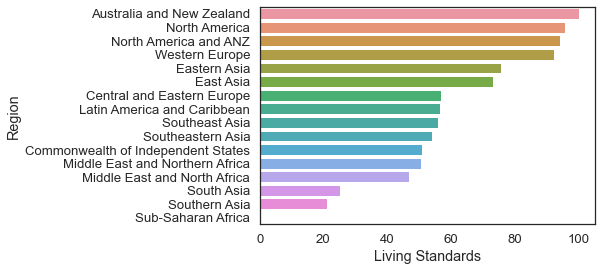

In [ ]:
sns.barplot(data=ordered_by_sum_region_normalized, x="Analyzed Happiness Score", y="Region")

plt.xlabel('Living Standards')
plt.ylabel('Region')
plt.show()

#### Figure 2: This scatter plot shows the difference between the Analyzed Happiness Score and the Provided Happiness Score of each of the regions with their respective living standards

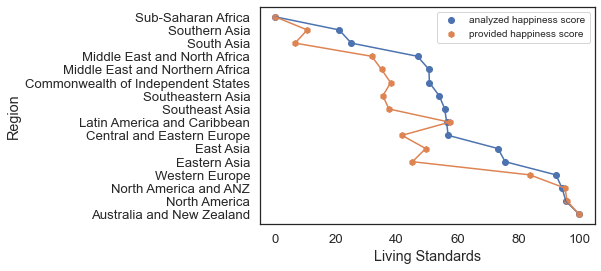

<Figure size 2160x2160 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(x=ordered_by_sum_region_normalized['Analyzed Happiness Score'],y=ordered_by_sum_region_normalized['Region'],marker='o',label="analyzed happiness score")
plt.scatter(x=ordered_by_sum_region_normalized['Happiness Score'],y=ordered_by_sum_region_normalized['Region'],marker='h',label="provided happiness score")

plt.plot(ordered_by_sum_region_normalized['Analyzed Happiness Score'],ordered_by_sum_region_normalized['Region'])
plt.plot(ordered_by_sum_region_normalized['Happiness Score'],ordered_by_sum_region_normalized['Region'])

plt.xlabel('Living Standards')
plt.ylabel('Region')

plt.legend(loc='best', prop={'size': 10})
plt.figure(figsize=(30, 30))

plt.tight_layout()

plt.show()

plt.savefig('analysis2.1.png')


#### Figure 3: Getting the top 10 countries with the best living standards based on my algorithm using a bar plot

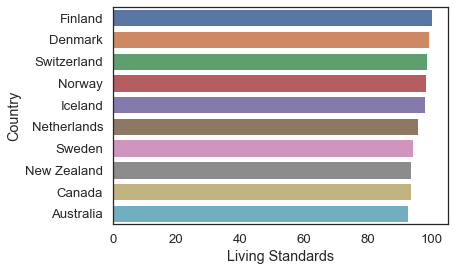

In [ ]:
best_10_countries = ordered_by_sum_country_normalized[:10]
sns.barplot(data=best_10_countries, x="Analyzed Happiness Score", y="Country")
#plt.xticks(rotation = 90)
plt.xlabel('Living Standards')
plt.ylabel('Country')
plt.show()
#print(best_10_countries)

#### Figure 4: This scatter plot shows the difference between the Analyzed Happiness Score and the Provided Happiness Score of each of the top 10 countries with the best living standards

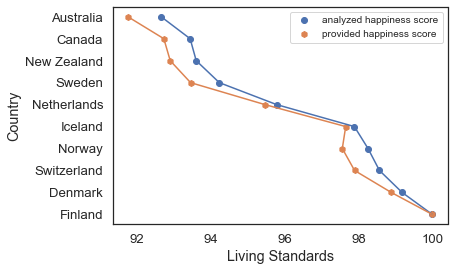

<Figure size 2160x2160 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(x=best_10_countries['Analyzed Happiness Score'],y=best_10_countries['Country'],marker='o',label="analyzed happiness score")
plt.scatter(x=best_10_countries['Happiness Score'],y=best_10_countries['Country'],marker='h',label="provided happiness score")

plt.plot(best_10_countries['Analyzed Happiness Score'],best_10_countries['Country'])
plt.plot(best_10_countries['Happiness Score'],best_10_countries['Country'])

plt.xlabel('Living Standards')
plt.ylabel('Country')

plt.legend(loc='best', prop={'size': 10})
plt.figure(figsize=(30, 30))

plt.tight_layout()
plt.show()
plt.savefig('analysis2.2.png')


#### Figure 5: Getting the top 10 countries with the worst living standards based on my algorithm using a bar plot

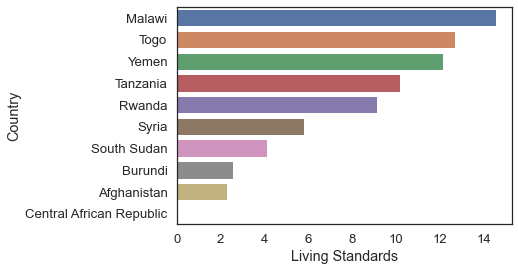

In [ ]:
worst_10_countries = ordered_by_sum_country_normalized[159:170]
sns.barplot(data=worst_10_countries, x="Analyzed Happiness Score", y="Country")

plt.xlabel('Living Standards')
plt.ylabel('Country')
plt.show()

#### Figure 6: This scatter plot shows the difference between the Analyzed Happiness Score and the Provided Happiness Score of each of the top 10 countries with the worst living standards

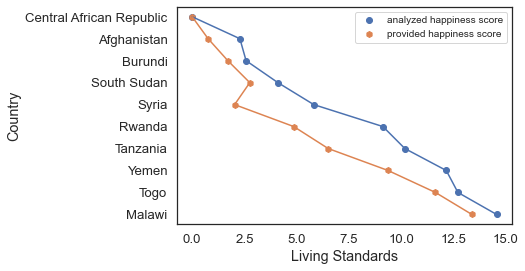

<Figure size 2160x2160 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(x=worst_10_countries['Analyzed Happiness Score'],y=worst_10_countries['Country'],marker='o',label="analyzed happiness score")
plt.scatter(x=worst_10_countries['Happiness Score'],y=worst_10_countries['Country'],marker='h', label="provided happiness score")

plt.plot(worst_10_countries['Analyzed Happiness Score'],worst_10_countries['Country'])
plt.plot(worst_10_countries['Happiness Score'],worst_10_countries['Country'])

plt.xlabel('Living Standards')
plt.ylabel('Country')

plt.legend(loc='best', prop={'size': 10})
plt.figure(figsize=(30, 30))

plt.tight_layout()
plt.show()
plt.savefig('analysis2.3.png')


## Conclusion

### My analysis has shown that the countries that offer the best living standards between 2015-2021 is the average of the scores of happiness score, social support, economy, freedom, and government corruption added together. Before adding them together, I have normalized and multiplied weights based on the correlation of Analysis 1 to all of the columns to get an accurate score. Moreover, I have compared my conclusion with each of the countries' Happiness Score, and I have found that my analysis was well supported by the Happiness Score as shown in the visualizations. There are some outliers where the Analyzed Happiness Score and the Provided Happiness Score's differed drastically such as Singapore, that could have been due to other reasons that are not included in the dataset.

#### Saving my processed dataset

In [ ]:
ordered_by_sum_country_normalized.to_csv('../data/processed/world_happiness_report_processed_Notebook2.csv')
'''to save cleaned dataset into processed folder'''

'to save cleaned dataset into processed folder'

#### The method for loading and processing the dataset for the EDA
##### There is more steps that I took however it was by grouping the countries and doing further manipulation that kept giving me a lot of errors whenever I put it into the method function

In [ ]:
import pandas as pd
import numpy as np

def load_and_process(url_or_path_to_csv_file):
    
    df = (pd.read_csv(url_or_path_to_csv_file))
    df_cleaned = (df[df.Region != '-'])
    df_cleaned_2 = (df_cleaned.copy().drop(['Generosity'], axis=1)
                     .copy().drop(df_cleaned.columns[0], axis=1)
                     .dropna(axis=0))
    df_cleaned_3 = (df_cleaned_2[df_cleaned_2.Year != 2022])
    df_cleaned_4 = (df_cleaned_3.copy().drop(['Year'], axis=1)
                    
    df_cleaned_4["Happiness Score"]=df_cleaned_4["Happiness Score"].astype(float)
    df_cleaned_4["Economy (GDP per Capita)"]=df_cleaned_4["Economy (GDP per Capita)"].astype(float)
    df_cleaned_4["Family (Social Support)"]=df_cleaned_4["Family (Social Support)"].astype(float)
    df_cleaned_4["Health (Life Expectancy)"]=df_cleaned_4["Health (Life Expectancy)"].astype(float)
    df_cleaned_4["Freedom"]=df_cleaned_4["Freedom"].astype(float)
    df_cleaned_4["Trust (Government Corruption)"]=df_cleaned_4["Trust (Government Corruption)"].astype(float)

    # Make sure to return the latest dataframe
    return df_cleaned_4

'''Method Chaining'''

SyntaxError: invalid syntax (796542616.py, line 14)

#### Calling the dataset into the method

In [ ]:
load_and_process('../data/raw/world_happiness_report.csv')

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Year
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,2015
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,2015
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,2015
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,2015
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,2015
...,...,...,...,...,...,...,...,...,...,...
1078,145,Lesotho,Sub-Saharan Africa,3.512,0.45100,0.73100,0.00700,0.40500,0.01500,2021
1079,146,Botswana,Sub-Saharan Africa,3.467,1.09900,0.72400,0.34000,0.53900,0.08800,2021
1080,147,Rwanda,Sub-Saharan Africa,3.415,0.36400,0.20200,0.40700,0.62700,0.49300,2021
1081,148,Zimbabwe,Sub-Saharan Africa,3.145,0.45700,0.64900,0.24300,0.35900,0.07500,2021


#### I used the relative import to clean the dataset so with a few other manipulations, I can finally implement my dataframe to conclude the question to be answered

In [ ]:
from project_functions2 import load_and_process
df_cleaned_9 = load_and_process('../data/raw/world_happiness_report.csv')
df_cleaned_9

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Year
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,2015
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,2015
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,2015
3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,2015
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,2015
...,...,...,...,...,...,...,...,...,...,...
1078,145,Lesotho,Sub-Saharan Africa,3.512,0.451,0.731,0.007,0.405,0.015,2021
1079,146,Botswana,Sub-Saharan Africa,3.467,1.099,0.724,0.34,0.539,0.088,2021
1080,147,Rwanda,Sub-Saharan Africa,3.415,0.364,0.202,0.407,0.627,0.493,2021
1081,148,Zimbabwe,Sub-Saharan Africa,3.145,0.457,0.649,0.243,0.359,0.075,2021
